In [5]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from rasterio.enums import Resampling
from rasterio.windows import from_bounds

In [8]:
url_cog = "http://datacube-prod-data-public.s3.ca-central-1.amazonaws.com/store/napl/salish/salish-1950-cog.tif"
filepath = url_cog

filepath = url_cog
with rasterio.open(filepath) as src:
    print(src.profile)

Decimation factor= 64
65955
148088
overviews:  [2, 4, 8, 16, 32, 64, 128]
array type:  <class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Text(0, 0.5, 'Row #')

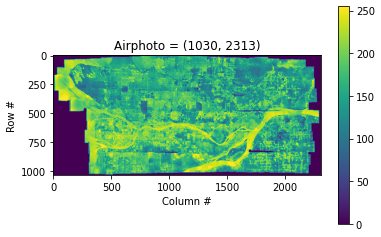

In [7]:
# The grid of raster values can be accessed as a numpy array and plotted:
with rasterio.open(filepath) as src:
    oviews = src.overviews(1) # only 1 band always overviews(1)
    oview = oviews[-2] # let's look at the smallest thumbnail -> 128
    print('Decimation factor= {}'.format(oview))
    
    # NOTE this is using a 'decimated read' (http://rasterio.readthedocs.io/en/latest/topics/resampling.html)
    thumbnail = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))
    
# get height and width
print(src.height)
print(src.width)

'''
Overviews are reduced resolution versions of your dataset that can speed up rendering when you don't need full resolution.
By precomputing the upsampled pixels, rendering can be significantly faster when zoomed out.
'''
print("overviews: ",oviews)
print('array type: ',type(thumbnail))
print(thumbnail)

plt.imshow(thumbnail)
plt.colorbar()
plt.title('Airphoto = {}'.format(thumbnail.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0, 0.5, 'Row #')

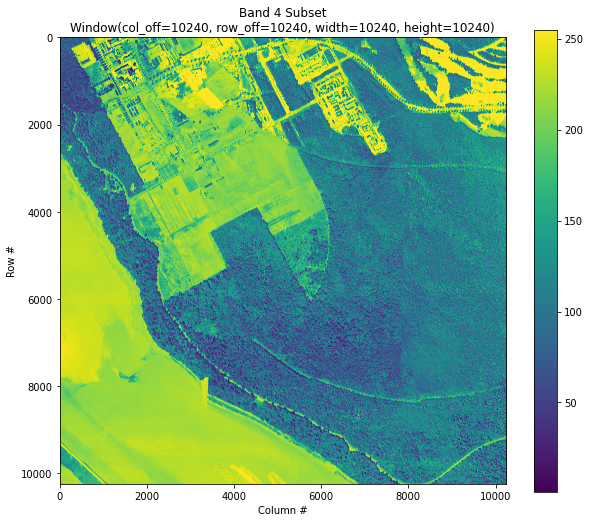

In [5]:
window = rasterio.windows.Window(10240, 10240, 10240, 10240)

with rasterio.open(filepath) as src:
    subset = src.read(1, window=window)

plt.figure(figsize=(10,8.5))
plt.imshow(subset)
plt.colorbar(shrink=1)
plt.title(f'Band 4 Subset\n{window}')
plt.xlabel('Column #')
plt.ylabel('Row #')

In [ ]:
# nearest neighbour
1. lowest quality
2. good to distinguish the types of vegetation
determine the turbidity of the lake, temperature
3. It can produce a position shift of up to half a pixel, which changes the geometric continuity of the pixel value. Some linear features in the original image will be distorted or thickened into blocks.

# bilinear
1. image smooth and has no steps
2. blockiness of linear features is reduced
3. the spatial position accuracy is higher
4. edges are smoothed, which is not conducive to edge detection
5. Blurred outline

# cubic
1. High frequency information loss is small
2. noise can be smoothed
3. edges are enhanced
4. the effect of equalization and clarity is achieved


In [ ]:
left = 478498.0729313628
bottom = 5452507.645790464
right = 513861.29575948894
top = 5459789.683238143

with rasterio.open(filepath) as src:
    oviews = src.overviews(1)
    rst = src.read(1, window=from_bounds(left, bottom, right, top, transform=src.transform, height=None, width=None, precision=None))
plt.imshow(rst)
plt.colorbar()
plt.xlabel('Column #')
plt.ylabel('Row #')